In [2]:
#----------------------------------------------IMPORT .CSV FROM WEBSITE

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Read CSV file, handling common missing value entries
na_vals = ["", "NA", "SUPP", "NP", "NE", "SP", "SN", "SUPPMAT"]
df_ks4 = pd.read_csv('https://raw.githubusercontent.com/huanfachen/QM/refs/heads/main/sessions/L2_data/england_ks4final.csv',
    na_values = na_vals
)

info_cols = ['RECTYPE', 'LEA', 'SCHNAME', 'TOTPUPS']
ebaccs_cols = ['EBACCAPS', 'EBACCAPS_LO', 'EBACCAPS_MID', 'EBACCAPS_HI']

df = df_ks4[info_cols + ebaccs_cols]

df.head()

/tmp/ipykernel_218/124135252.py:9: DtypeWarning: Columns (75,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,144,145,146,147,148,149,150,151,152,177,178,179,180,181,182,183,186,187,188,189,190,191,192,194,195,196,198,199,200,202,203,204,206,207,208,210,211,212,214,215,216,218,219,220,222,223,224,230,233,234,235,236,237,238,239,242,243,244,245,246,247,248,251,252,253,254,255,256,257,266,267,268,269,270,271,272,281,282,283,284,285,286,287,296,297,298,299,300,301,302,311,312,313,314,315,316,317,335,336,337,340,341,342,345,346,347,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ks4 = pd.read_csv('https://raw.githubusercontent.com/huanfachen/QM/refs/heads/main/sessions/L2_data/england_ks4final.csv',


,RECTYPE,LEA,SCHNAME,TOTPUPS,EBACCAPS,EBACCAPS_LO,EBACCAPS_MID,EBACCAPS_HI
0,1,201.0,City of London School,1045,2.10,NaN,NaN,NaN
1,1,201.0,City of London School for Girls,739,1.51,NaN,NaN,NaN
2,1,201.0,David Game College,365,0.56,NaN,NaN,NaN
3,4,201.0,NaN,0,NaN,NaN,NaN,NaN
4,1,202.0,Acland Burghley School,1163,4.62,1.91,3.81,6.87


In [3]:
#----------------------------------------------DESCRIBING THE DATA SET
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 5813, Columns: 8


In [5]:
#----------------------------------------------CHECKING THE DATA TYPE
df.dtypes

RECTYPE           int64
LEA             float64
SCHNAME          object
TOTPUPS          object
EBACCAPS        float64
EBACCAPS_LO     float64
EBACCAPS_MID    float64
EBACCAPS_HI     float64
dtype: object

In [6]:
#----------------------------------------------REFORMAT THE COLUMN NAMES
df[['TOTPUPS']+ebaccs_cols] = df[['TOTPUPS']+ebaccs_cols].apply(pd.to_numeric, errors='coerce')

/tmp/ipykernel_218/2408592153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['TOTPUPS']+ebaccs_cols] = df[['TOTPUPS']+ebaccs_cols].apply(pd.to_numeric, errors='coerce')


In [7]:
#----------------------------------------------CHECK TYPES AGAIN
df.dtypes

RECTYPE           int64
LEA             float64
SCHNAME          object
TOTPUPS         float64
EBACCAPS        float64
EBACCAPS_LO     float64
EBACCAPS_MID    float64
EBACCAPS_HI     float64
dtype: object

In [8]:
#----------------------------------------------CHECK OUT MISSING DATA FOR EACH COLUMN
df.isna().mean() * 100 

RECTYPE          0.000000
LEA              0.034406
SCHNAME          2.683640
TOTPUPS          1.221400
EBACCAPS        17.684500
EBACCAPS_LO     38.775159
EBACCAPS_MID    41.149148
EBACCAPS_HI     42.490969
dtype: float64

In [9]:
#----------------------------------------------RETURN ROWS WHERE "SCHNAME" IS MISSING
df[df['SCHNAME'].isna()]

,RECTYPE,LEA,SCHNAME,TOTPUPS,EBACCAPS,EBACCAPS_LO,EBACCAPS_MID,EBACCAPS_HI
3,4,201.0,NaN,0.0,NaN,NaN,NaN,NaN
24,4,202.0,NaN,10865.0,4.36,2.03,4.19,6.33
55,4,203.0,NaN,18998.0,4.13,2.14,4.21,5.77
88,4,204.0,NaN,15214.0,4.72,2.32,4.64,6.72
112,4,205.0,NaN,9905.0,5.12,2.26,4.93,6.90
...,...,...,...,...,...,...,...,...
5748,4,941.0,NaN,31801.0,3.96,2.16,4.04,6.08
5776,4,942.0,NaN,17442.0,3.81,2.08,3.85,5.54
5810,4,943.0,NaN,14503.0,3.97,2.29,3.81,5.80
5811,5,NaN,NaN,4129401.0,3.88,NaN,NaN,NaN


In [11]:
#----------------------------------------------ONLY KEEP WHERE RETYPE IS 1 OR 2
df = df[df['RECTYPE'].isin([1, 2])].copy()

In [12]:
#----------------------------------------------NOW LET'S CHECK
rows, cols = df.shape
print(f"Rows: {rows}, Columns: {cols}")
#THE OUTCOME IS THE ORIGINAL MINUS 156 ROWS

Rows: 5657, Columns: 8


In [13]:
#----------------------------------------------SUMMARY STATISTICS
numerical_cols = ['TOTPUPS', 'EBACCAPS', 'EBACCAPS_LO', 'EBACCAPS_MID', 'EBACCAPS_HI']

df[numerical_cols].describe()

,TOTPUPS,EBACCAPS,EBACCAPS_LO,EBACCAPS_MID,EBACCAPS_HI
count,5586.000000,4631.000000,3406.000000,3268.000000,3190.000000
mean,735.296097,3.428538,2.090628,4.033562,5.782893
std,552.209689,1.679245,0.769925,0.818922,0.856998
min,0.000000,0.000000,0.000000,0.100000,0.590000
25%,165.000000,2.820000,1.830000,3.560000,5.250000
50%,761.000000,3.700000,2.200000,3.980000,5.820000
75%,1149.000000,4.440000,2.520000,4.470000,6.350000
max,3440.000000,8.700000,5.320000,7.170000,8.730000


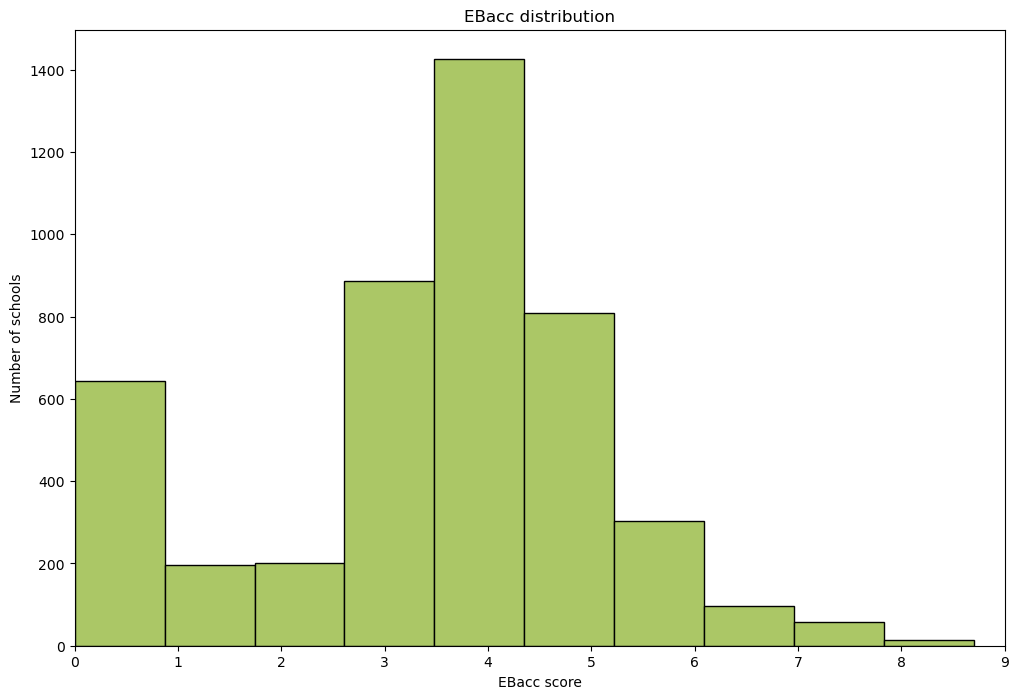

In [14]:
#----------------------------------------------HISTOGRAMS
n_bins = 10
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(df['EBACCAPS'].dropna(), bins=n_bins, color='#abc766', edgecolor='black')
ax.set_title('EBacc distribution')
ax.set_xlabel('EBacc score')
ax.set_ylabel('Number of schools')  
ax.set_xlim(0,9) # the EBacc has a maximum score of 9

plt.show()

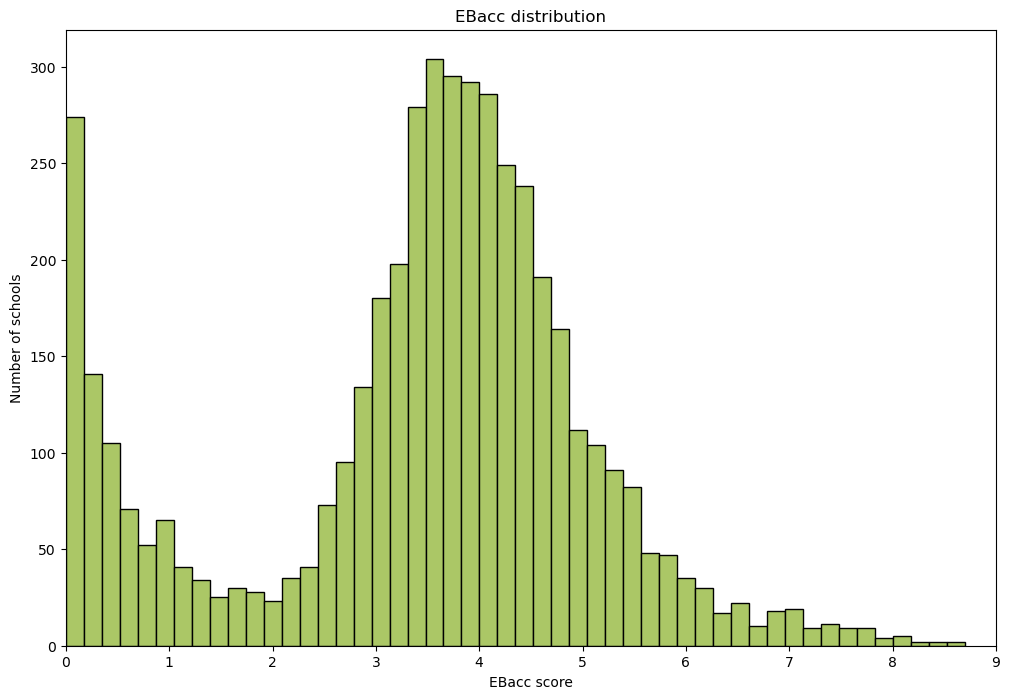

In [15]:
#----------------------------------------------HISTOGRAMS MORE ACCURATE
n_bins = 50
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(df['EBACCAPS'].dropna(), bins=n_bins, color='#abc766', edgecolor='black')
ax.set_title('EBacc distribution')
ax.set_xlabel('EBacc score')
ax.set_ylabel('Number of schools')  
ax.set_xlim(0,9) # the EBacc has a maximum score of 9

plt.show()

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_218/2370546185.py:21: SyntaxWarning: invalid escape sequence '\m'
  plt.title(f"Fit results: $\mu$ = {mu:.2f},  $\sigma$ = {std:.2f}")
/tmp/ipykernel_218/2370546185.py:21: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Fit results: $\mu$ = {mu:.2f},  $\sigma$ = {std:.2f}")
/tmp/ipykernel_218/2370546185.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="#e16fca")


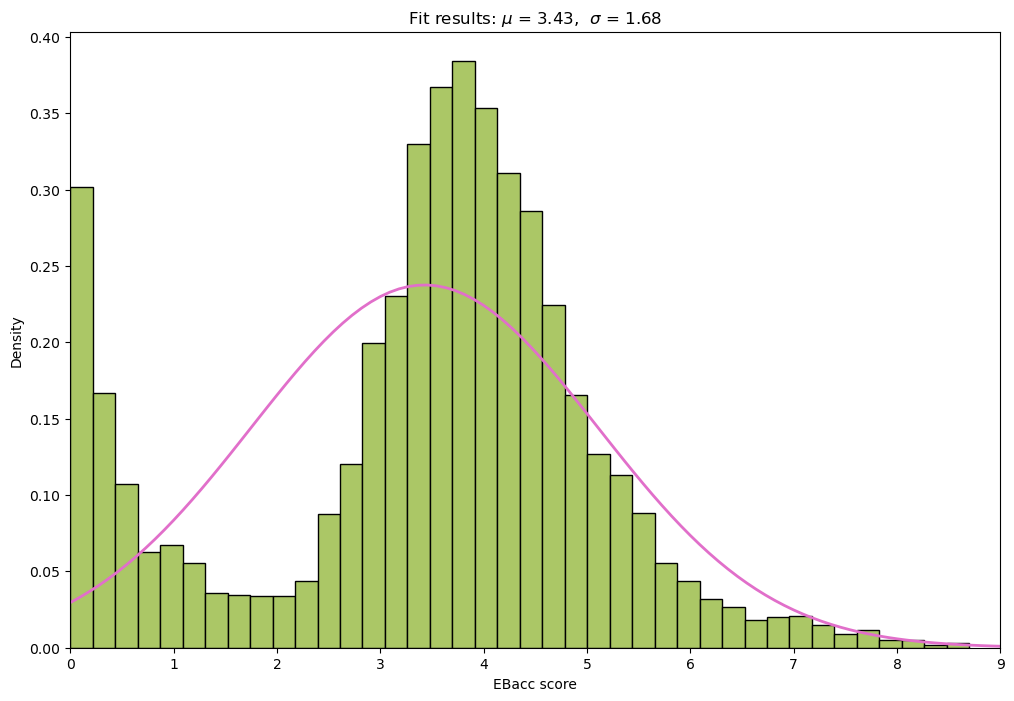

In [16]:
#----------------------------------------------LET ADD THE NORMAL DISTRIBUTION LINE
import scipy.stats as sps

#FIRST WE GET THE MEAN AND STANDAR DEVIATION
mu = df['EBACCAPS'].dropna().mean()
std = df['EBACCAPS'].dropna().std()

#CREATE DE PLOT

#PLOT DE HISTOGRAM
plt.figure(figsize=(12, 8))
plt.hist(df['EBACCAPS'], bins=40, density=True, color='#abc766', edgecolor='black')

#PLOT THE PROBABILITY DENSITY FUNCTION (PDF)
xmin = 0 
xmax = 9
x = np.linspace(xmin, xmax, 100)
p = sps.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, color="#e16fca")

plt.title(f"Fit results: $\mu$ = {mu:.2f},  $\sigma$ = {std:.2f}")
plt.xlim(0, 9)
plt.xlabel("EBacc score")
plt.ylabel("Density")

plt.show()

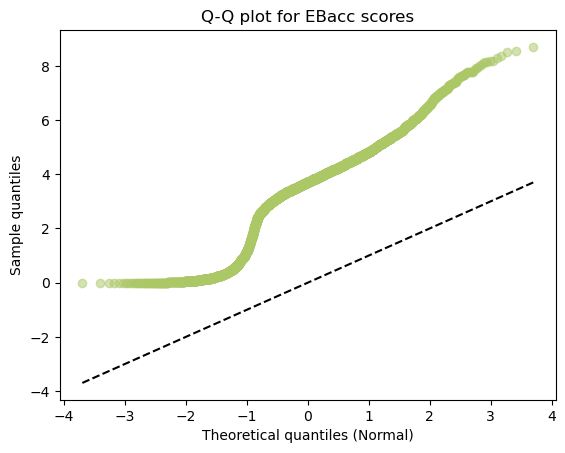

In [17]:
#----------------------------------------------PLOT THE Q-Q PLOT
#DROP MISSING VALUES
data = df['EBACCAPS'].dropna().values
n = len(data)

#SORT THE SAMPLE DATA
sample_quantiles = np.sort(data)

#COMPUTE PLOTTING POSITIONS (PROBABILITIES)
p = (np.arange(1, n+1) - 0.5) / n

#COMPUTE THEORETICAL QUANTILES FROM STANDARD NORMAL
theoretical_quantiles = sps.norm.ppf(p)

#PLOT
plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.5, color='#abc766')
plt.plot(theoretical_quantiles, theoretical_quantiles, color='black', linestyle='--')  # reference line
plt.title("Q-Q plot for EBacc scores")
plt.xlabel("Theoretical quantiles (Normal)")
plt.ylabel("Sample quantiles")

plt.show()

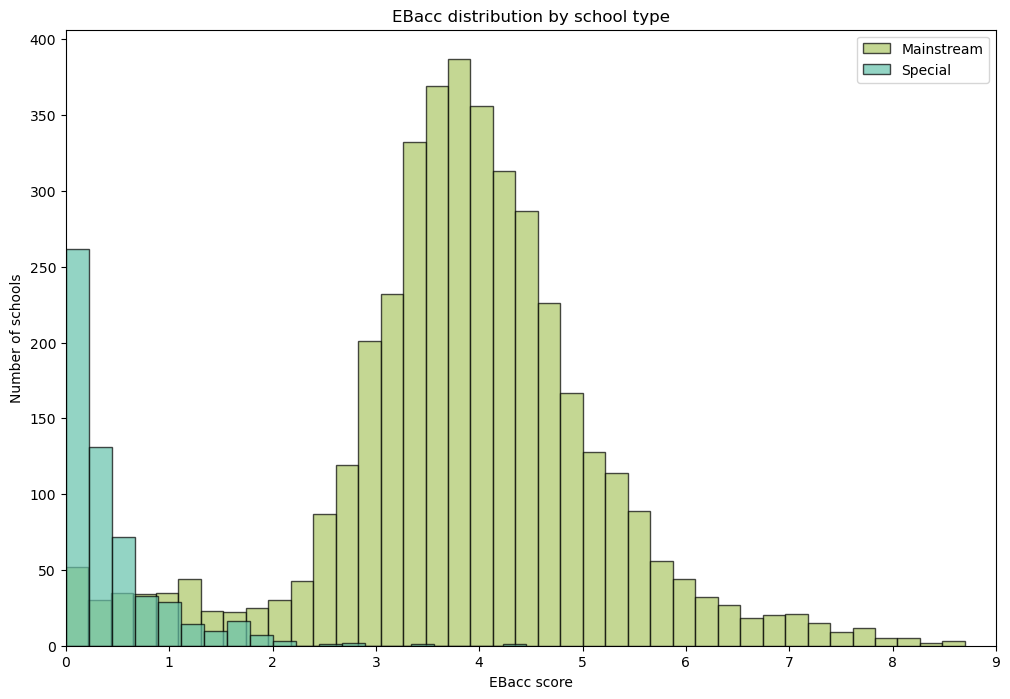

In [18]:
#----------------------------------------------SPLIT HISTOGRAM ACCORDING TO TYPE OF SCHOOL
# histogram of # plot histogram of EBACCAPS by RECTYPE
n_bins = {1:40, 2:20}
fig, ax = plt.subplots(figsize=(12, 8))
for rectype, color, label in zip([1, 2], ['#abc766', '#66c2ab'], ['Mainstream', 'Special']):
    ax.hist(df_ks4.loc[df_ks4['RECTYPE'] == rectype, 'EBACCAPS'].dropna(), bins=n_bins[rectype], alpha=0.7, color=color, edgecolor='black', label=label)
ax.set_title('EBacc distribution by school type')
ax.set_xlabel('EBacc score')
ax.set_ylabel('Number of schools')  
ax.set_xlim(0,9)
ax.legend()

plt.show()

In [ ]:
#----------------------------------------------